In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('turkis_music_emotion_original.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [15]:
df.head()

Class  _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
0  relax            0.052            0.591              9.136      130.043   
1  relax            0.125            0.439              6.680      142.240   
2  relax            0.046            0.639             10.578      188.154   
3  relax            0.135            0.603             10.442       65.991   
4  relax            0.066            0.591              9.769       88.890   

   _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  ...  \
0         3.997         0.363         0.887         0.078         0.221  ...   
1         4.058         0.516         0.785         0.397         0.556  ...   
2         2.775         0.903         0.502         0.329         0.287  ...   
3         2.841         1.552         0.612         0.351         0.011  ...   
4         3.217         0.228         0.814         0.096         0.434  ...   

   _Chromagram_Mean_9  _Chromagram_Mean_10  _Chromagram_Mean_11  \
0               0.426                1.000                0.008   
1               0.002                1.000                0.000   
2               0.184                0.746                0.016   
3               0.038                1.000                0.161   
4               0.004                0.404                1.000   

   _Chromagram_Mean_12  _HarmonicChangeDetectionFunction_Mean  \
0                0.101                                  0.316   
1                0.984                                  0.285   
2                1.000                                  0.413   
3                0.757                                  0.422   
4                0.001                                  0.345   

   _HarmonicChangeDetectionFunction_Std  \
0                                 0.261   
1                                 0.211   
2                                 0.299   
3                                 0.265   
4                                 0.261   

   _HarmonicChangeDetectionFunction_Slope  \
0                                   0.018   
1                                  -0.082   
2                                   0.134   
3                                   0.042   
4                                   0.089   

   _HarmonicChangeDetectionFunction_PeriodFreq  \
0                                        1.035   
1                                        3.364   
2                                        1.682   
3                                        0.354   
4                                        0.748   

   _HarmonicChangeDetectionFunction_PeriodAmp  \
0                                       0.593   
1                                       0.702   
2                                       0.692   
3                                       0.743   
4                                       0.674   

   _HarmonicChangeDetectionFunction_PeriodEntropy  
0                                           0.970  
1                                           0.967  
2                                           0.963  
3                                           0.968  
4                                           0.957  

[5 rows x 51 columns]

In [5]:
df.describe()

_RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
count       400.000000       400.000000         400.000000   400.000000   
mean          0.134650         0.553605           7.145932   123.682020   
std           0.064368         0.050750           2.280145    34.234344   
min           0.010000         0.302000           3.580000    48.284000   
25%           0.085000         0.523000           5.859500   101.490250   
50%           0.128000         0.553000           6.734000   120.132500   
75%           0.174000         0.583250           7.823500   148.986250   
max           0.431000         0.703000          23.475000   195.026000   

       _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
count    400.000000    400.000000    400.000000    400.000000    400.000000   
mean       2.456422      0.071890      0.488065      0.030465      0.178897   
std        0.799262      0.537865      0.294607      0.275839      0.195230   
min        0.323000     -3.484000     -0.870000     -1.636000     -0.494000   
25%        1.948500     -0.262750      0.281250     -0.117000      0.061250   
50%        2.389500      0.068500      0.464500      0.044500      0.181000   
75%        2.860250      0.413250      0.686000      0.198250      0.288500   
max        5.996000      1.937000      1.622000      1.126000      1.055000   

       _MFCC_Mean_6  ...  _Chromagram_Mean_9  _Chromagram_Mean_10  \
count    400.000000  ...          400.000000           400.000000   
mean       0.038307  ...            0.354632             0.590975   
std        0.203754  ...            0.334976             0.357981   
min       -0.916000  ...            0.000000             0.000000   
25%       -0.078250  ...            0.066750             0.264500   
50%        0.049500  ...            0.247000             0.612000   
75%        0.151250  ...            0.612000             1.000000   
max        0.799000  ...            1.000000             1.000000   

       _Chromagram_Mean_11  _Chromagram_Mean_12  \
count           400.000000           400.000000   
mean              0.342340             0.385620   
std               0.315808             0.348117   
min               0.000000             0.000000   
25%               0.059500             0.060750   
50%               0.247000             0.296500   
75%               0.565250             0.670750   
max               1.000000             1.000000   

       _HarmonicChangeDetectionFunction_Mean  \
count                             400.000000   
mean                                0.328213   
std                                 0.055520   
min                                 0.112000   
25%                                 0.290750   
50%                                 0.333000   
75%                                 0.367250   
max                                 0.488000   

       _HarmonicChangeDetectionFunction_Std  \
count                            400.000000   
mean                               0.192997   
std                                0.047092   
min                                0.060000   
25%                                0.160000   
50%                                0.190000   
75%                                0.226000   
max                                0.340000   

       _HarmonicChangeDetectionFunction_Slope  \
count                              400.000000   
mean                                -0.000157   
std                                  0.104743   
min                                 -0.285000   
25%                                 -0.058000   
50%                                 -0.002000   
75%                                  0.063250   
max                                  0.442000   

       _HarmonicChangeDetectionFunction_PeriodFreq  \
count                                   400.000000   
mean                                      1.762288   
std                                       0.930352   
min                   

In [6]:
porcentaje_faltantes = df.isna().mean() * 100
porcentaje_faltantes

Class                                             0.0
_RMSenergy_Mean                                   0.0
_Lowenergy_Mean                                   0.0
_Fluctuation_Mean                                 0.0
_Tempo_Mean                                       0.0
_MFCC_Mean_1                                      0.0
_MFCC_Mean_2                                      0.0
_MFCC_Mean_3                                      0.0
_MFCC_Mean_4                                      0.0
_MFCC_Mean_5                                      0.0
_MFCC_Mean_6                                      0.0
_MFCC_Mean_7                                      0.0
_MFCC_Mean_8                                      0.0
_MFCC_Mean_9                                      0.0
_MFCC_Mean_10                                     0.0
_MFCC_Mean_11                                     0.0
_MFCC_Mean_12                                     0.0
_MFCC_Mean_13                                     0.0
_Roughness_Mean             

Descripción Variables númericas

In [8]:
columnas_numericas = df.select_dtypes(include=[np.number])
describe_df = columnas_numericas.describe()
nom_estadisticas = {
    'mean': 'Media',
    '50%': 'Mediana/Cuartil 50%',
    'min': 'Min',
    'max': 'Max',
    'std': 'Desviacion estandar',
    '25%': 'Cuartil 25%',
    '75%': 'Cuartil 75%'
}

estadisticas = describe_df.rename(index=nom_estadisticas).drop(index='count')
estadisticas

_RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  \
Media                       0.134650         0.553605           7.145932   
Desviacion estandar         0.064368         0.050750           2.280145   
Min                         0.010000         0.302000           3.580000   
Cuartil 25%                 0.085000         0.523000           5.859500   
Mediana/Cuartil 50%         0.128000         0.553000           6.734000   
Cuartil 75%                 0.174000         0.583250           7.823500   
Max                         0.431000         0.703000          23.475000   

                     _Tempo_Mean  _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  \
Media                 123.682020      2.456422      0.071890      0.488065   
Desviacion estandar    34.234344      0.799262      0.537865      0.294607   
Min                    48.284000      0.323000     -3.484000     -0.870000   
Cuartil 25%           101.490250      1.948500     -0.262750      0.281250   
Mediana/Cuartil 50%   120.132500      2.389500      0.068500      0.464500   
Cuartil 75%           148.986250      2.860250      0.413250      0.686000   
Max                   195.026000      5.996000      1.937000      1.622000   

                     _MFCC_Mean_4  _MFCC_Mean_5  _MFCC_Mean_6  ...  \
Media                    0.030465      0.178897      0.038307  ...   
Desviacion estandar      0.275839      0.195230      0.203754  ...   
Min                     -1.636000     -0.494000     -0.916000  ...   
Cuartil 25%             -0.117000      0.061250     -0.078250  ...   
Mediana/Cuartil 50%      0.044500      0.181000      0.049500  ...   
Cuartil 75%              0.198250      0.288500      0.151250  ...   
Max                      1.126000      1.055000      0.799000  ...   

                     _Chromagram_Mean_9  _Chromagram_Mean_10  \
Media                          0.354632             0.590975   
Desviacion estandar            0.334976             0.357981   
Min                            0.000000             0.000000   
Cuartil 25%                    0.066750             0.264500   
Mediana/Cuartil 50%            0.247000             0.612000   
Cuartil 75%                    0.612000             1.000000   
Max                            1.000000             1.000000   

                     _Chromagram_Mean_11  _Chromagram_Mean_12  \
Media                           0.342340             0.385620   
Desviacion estandar             0.315808             0.348117   
Min                             0.000000             0.000000   
Cuartil 25%                     0.059500             0.060750   
Mediana/Cuartil 50%             0.247000             0.296500   
Cuartil 75%                     0.565250             0.670750   
Max                             1.000000             1.000000   

                     _HarmonicChangeDetectionFunction_Mean  \
Media                                             0.328213   
Desviacion estandar                               0.055520   
Min                                               0.112000   
Cuartil 25%                                       0.290750   
Mediana/Cuartil 50%                               0.333000   
Cuartil 75%                                       0.367250   
Max                                               0.488000   

                     _HarmonicChangeDetectionFunction_Std  \
Media                                            0.192997   
Desviacion estandar                              0.047092   
Min                                              0.060000   
Cuartil 25%                                      0.160000   
Mediana/Cuartil 50%                              0.190000   
Cuartil 75%                                      0.226000   
Max                                              0.340000   

                     _HarmonicChangeDetectionFunction_Slope  \
Media                                             -0.000157   
Desviacion estandar                                0.104743   
Min              

ValueError: num must be an integer with 1 <= num <= 12, not 13

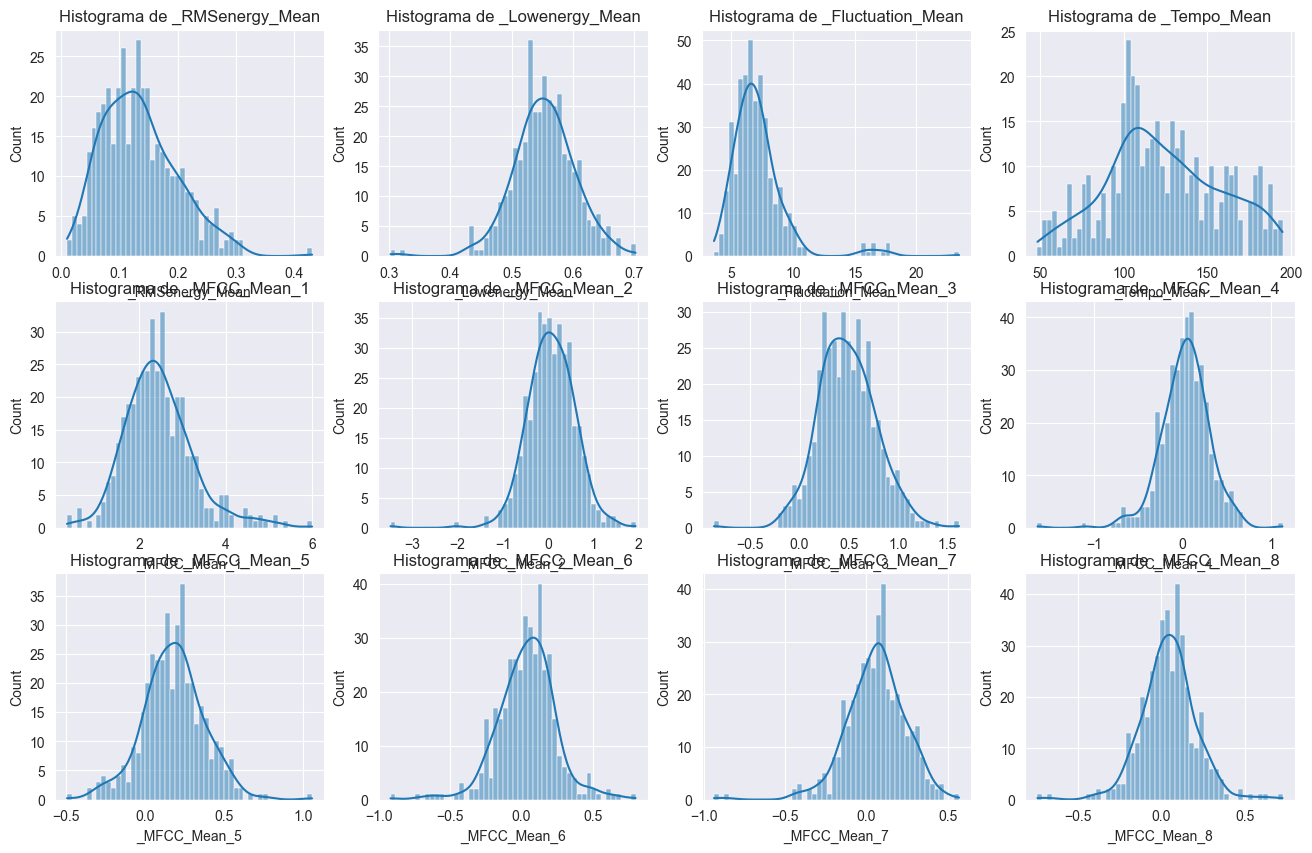

In [11]:
plt.figure(figsize=(16, 10))

for col in columnas_numericas.columns:
    plt.subplot(3, 4, columnas_numericas.columns.get_loc(col) + 1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title('Histograma de {}'.format(col))

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 8, not 9

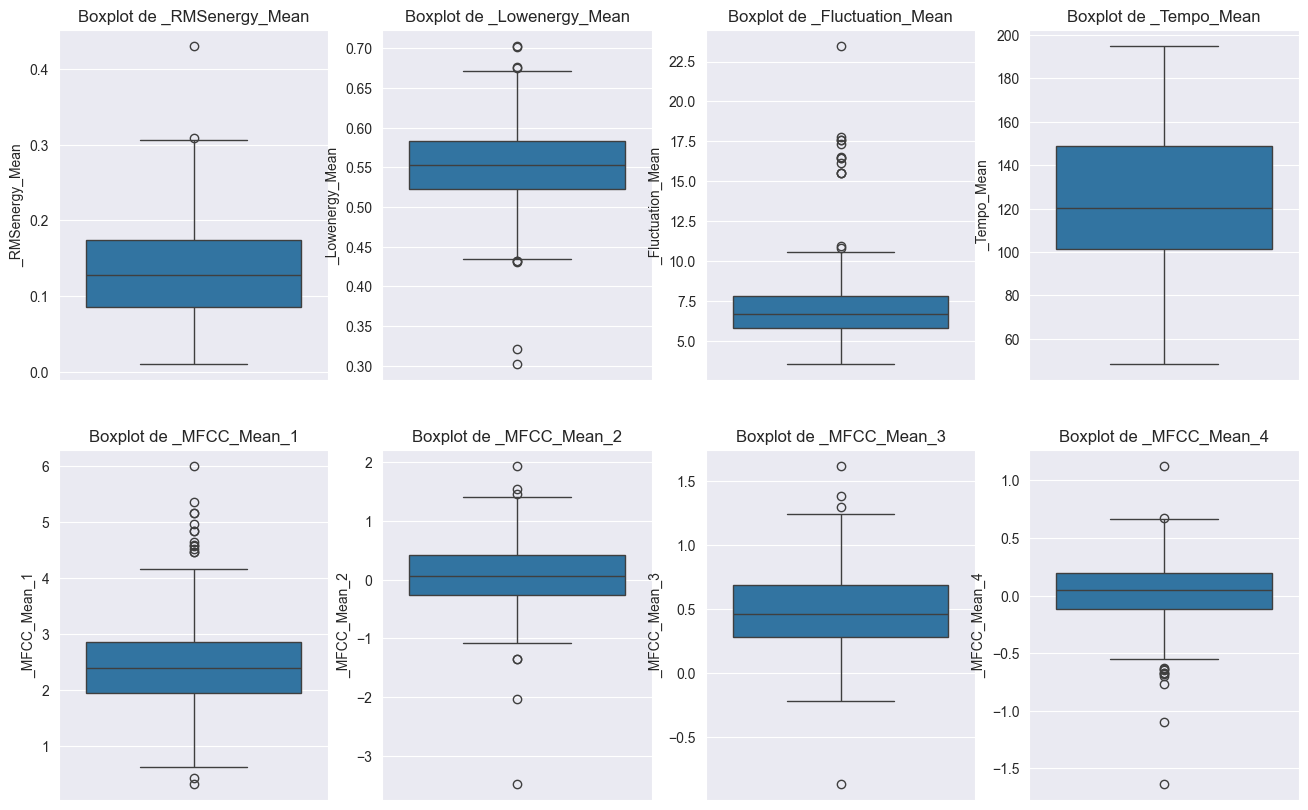

In [12]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(columnas_numericas):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()

plt.show()

Variables de texto

In [13]:
num_no_numericos_columnas = df.select_dtypes(exclude=[np.number])
estadisticas_default = num_no_numericos_columnas.describe(include = 'object')

nom_estadisticas = {
    'top': 'Moda',
    'unique': 'Cardinalidad'
}

estadisticas = estadisticas_default.rename(index=nom_estadisticas).drop(index=['count','freq'])
estadisticas

Class
Cardinalidad      4
Moda          relax

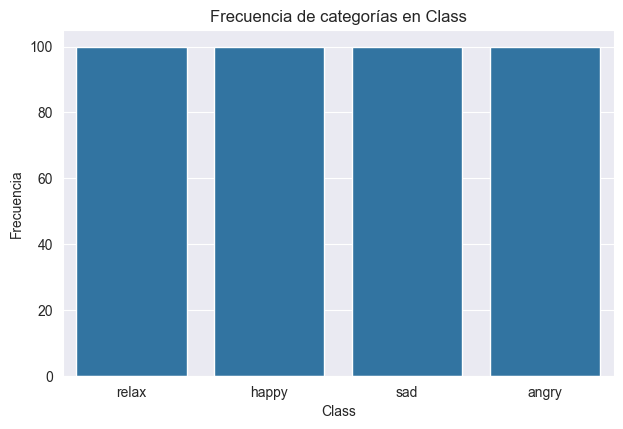

In [14]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_no_numericos_columnas):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df)
    plt.title('Frecuencia de categorías en {}'.format(col))
    plt.ylabel('Frecuencia')
    plt.xlabel(col)

plt.tight_layout()

plt.show()

                   _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  \
_RMSenergy_Mean           1.000000        -0.281123          -0.170943   
_Lowenergy_Mean          -0.281123         1.000000           0.051927   
_Fluctuation_Mean        -0.170943         0.051927           1.000000   
_Tempo_Mean               0.001018        -0.041363          -0.119922   
_MFCC_Mean_1             -0.196514         0.123084           0.077035   

                   _Tempo_Mean  _MFCC_Mean_1  
_RMSenergy_Mean       0.001018     -0.196514  
_Lowenergy_Mean      -0.041363      0.123084  
_Fluctuation_Mean    -0.119922      0.077035  
_Tempo_Mean           1.000000     -0.065000  
_MFCC_Mean_1         -0.065000      1.000000  


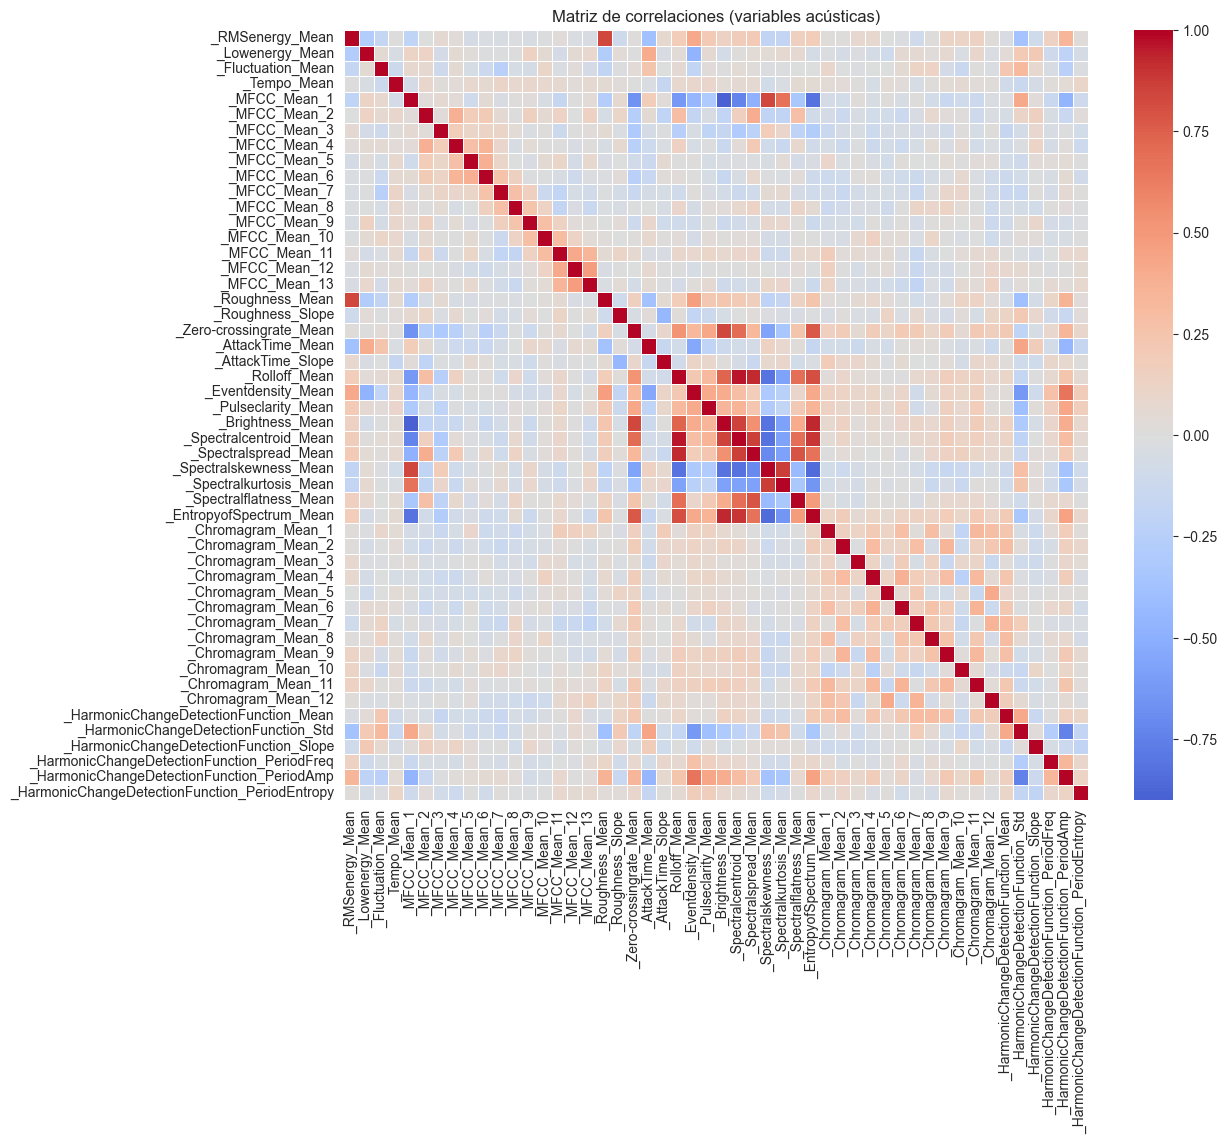

In [19]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

corr_matrix = df_numeric.corr()

# Mostrar parte de la matriz
print(corr_matrix.iloc[:5, :5])

# Visualización
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlaciones (variables acústicas)")
plt.show()

In [20]:
df_limpio = df.copy()

for col in numeric_cols:
    Q1 = df_limpio[col].quantile(0.25)
    Q3 = df_limpio[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar
    df_limpio = df_limpio[(df_limpio[col] >= limite_inferior) & (df_limpio[col] <= limite_superior)]

    print(f"{col}: Filas restantes {df_limpio.shape[0]}")


_RMSenergy_Mean: Filas restantes 398
_Lowenergy_Mean: Filas restantes 390
_Fluctuation_Mean: Filas restantes 377
_Tempo_Mean: Filas restantes 377
_MFCC_Mean_1: Filas restantes 364
_MFCC_Mean_2: Filas restantes 356
_MFCC_Mean_3: Filas restantes 353
_MFCC_Mean_4: Filas restantes 345
_MFCC_Mean_5: Filas restantes 341
_MFCC_Mean_6: Filas restantes 326
_MFCC_Mean_7: Filas restantes 319
_MFCC_Mean_8: Filas restantes 310
_MFCC_Mean_9: Filas restantes 305
_MFCC_Mean_10: Filas restantes 301
_MFCC_Mean_11: Filas restantes 292
_MFCC_Mean_12: Filas restantes 288
_MFCC_Mean_13: Filas restantes 278
_Roughness_Mean: Filas restantes 265
_Roughness_Slope: Filas restantes 259
_Zero-crossingrate_Mean: Filas restantes 254
_AttackTime_Mean: Filas restantes 238
_AttackTime_Slope: Filas restantes 237
_Rolloff_Mean: Filas restantes 237
_Eventdensity_Mean: Filas restantes 234
_Pulseclarity_Mean: Filas restantes 228
_Brightness_Mean: Filas restantes 228
_Spectralcentroid_Mean: Filas restantes 227
_Spectralsprea

ValueError: num must be an integer with 1 <= num <= 8, not 9

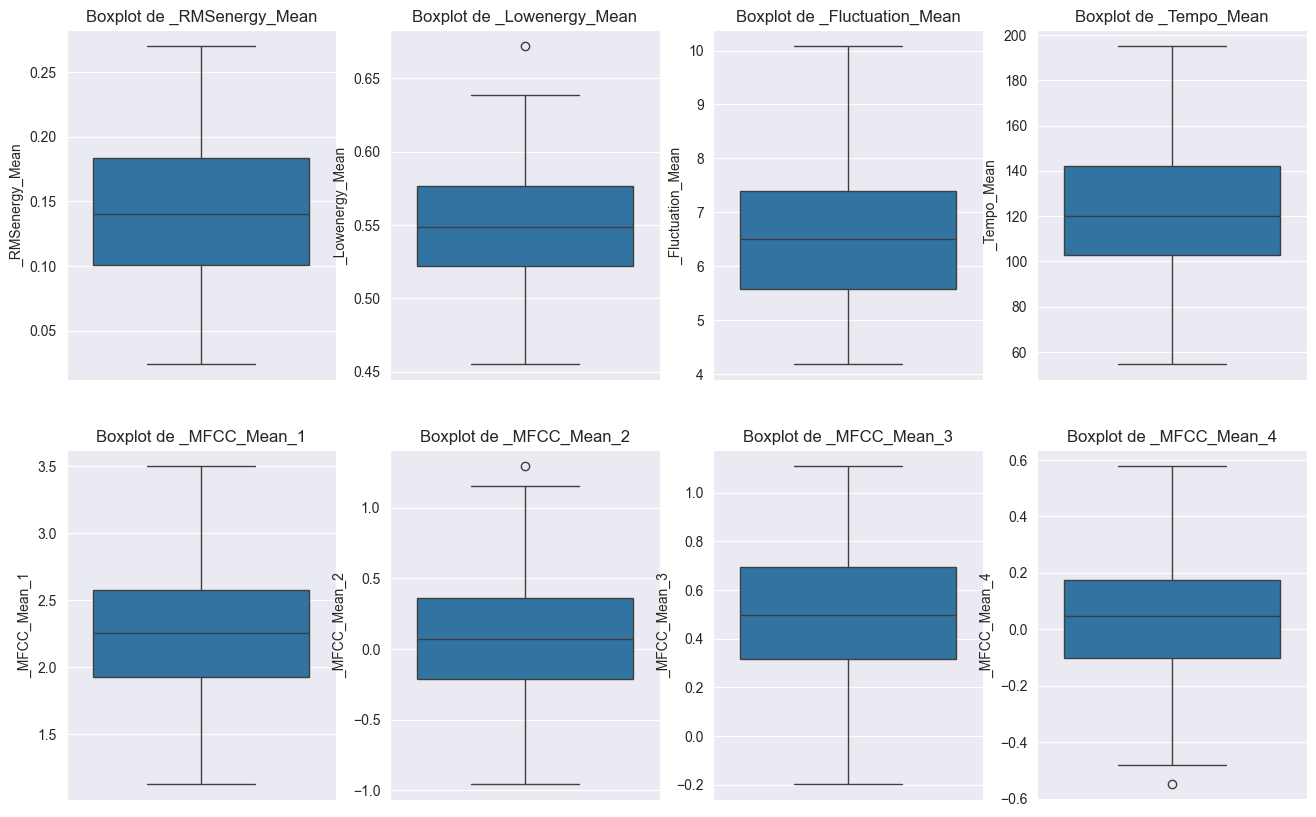

In [22]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(columnas_numericas):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df_limpio[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()

plt.show()

Transformaciones

In [26]:
target_col = "Class"

X = df_limpio.drop(columns=[target_col])
y = df_limpio[target_col]

#Categoricas
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Clases originales:", list(le.classes_))
print("Primeros y codificados:", y.head(5).tolist(), "->", y_encoded[:5])


X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#Numericas
scaler = StandardScaler(with_mean=True, with_std=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled[:3], X_test_scaled[:3]

#Reduccion de dimencionalidad PCA
usar_pca = True
n_components = 50


pca = PCA(n_components=n_components, random_state=42)
X_train_final = pca.fit_transform(X_train_scaled)
X_test_final  = pca.transform(X_test_scaled)
print("Varianza explicada por componente:", pca.explained_variance_ratio_)
print("Varianza acumulada:", pca.explained_variance_ratio_.sum())
X_train_final = X_train_scaled
X_test_final  = X_test_scaled





Clases originales: ['angry', 'happy', 'relax', 'sad']
Primeros y codificados: ['relax', 'relax', 'relax', 'relax', 'relax'] -> [2 2 2 2 2]
Varianza explicada por componente: [1.57080117e-01 8.97106575e-02 7.77808212e-02 6.67290051e-02
 5.33990332e-02 4.70116076e-02 4.09517393e-02 3.79319526e-02
 3.35048197e-02 3.19393733e-02 2.76376632e-02 2.50577301e-02
 2.38930642e-02 2.19180449e-02 2.03252301e-02 1.96004030e-02
 1.83641341e-02 1.63314992e-02 1.59544257e-02 1.52695980e-02
 1.46111095e-02 1.35918514e-02 1.24501023e-02 1.13110108e-02
 1.03291077e-02 9.57444196e-03 9.32589664e-03 8.97027760e-03
 8.53900024e-03 7.60802885e-03 7.10153623e-03 6.67198947e-03
 5.24911873e-03 5.03962401e-03 4.39307129e-03 4.17846570e-03
 3.89544212e-03 3.32978638e-03 2.83015909e-03 2.43209831e-03
 2.32198547e-03 1.92075503e-03 1.13811434e-03 8.26947254e-04
 7.26654774e-04 5.43159619e-04 4.43080261e-04 1.64767424e-04
 5.98385250e-05 3.16604952e-05]
Varianza acumulada: 1.0000000000000002


/Users/salvadorhernandez/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/salvadorhernandez/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/salvadorhernandez/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Users/salvadorhernandez/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:155: RuntimeWarning: divide by zero encountered in matmul
  X_transformed -= xp.reshape(self.mean_, (1, -1)) @ self.components_.T
/Users/salvadorhernandez/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:155: RuntimeWarning: overflow 